### Gender Classification from Blood Test Results Using PyTorch

In this project, we develop a binary classification model using **PyTorch** to predict a patient's gender (**Male or Female**) based on common **blood test values**:

- Hemoglobin (g/dL)
- Platelet Count (10^9/L)
- White Blood Cells (10^9/L)
- Red Blood Cells (10^12/L)
- MCV (Mean Corpuscular Volume, fL)
- MCH (Mean Corpuscular Hemoglobin, pg)
- MCHC (Mean Corpuscular Hemoglobin Concentration, g/dL)

Data: `blood_count_dataset.csv` file contains historical blood test results and gender labels. This dataset is publicly available on https://www.kaggle.com/datasets/vizeno/complete-blood-count-cbc-dataset



In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import joblib

In [31]:
# Step 1: Load and Preprocess Data
print("Loading and preprocessing data...")
data = pd.read_csv('blood_count_dataset.csv')

Loading and preprocessing data...


In [32]:
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})

In [33]:
features = ['Hemoglobin', 'Platelet_Count', 'White_Blood_Cells',
            'Red_Blood_Cells', 'MCV', 'MCH', 'MCHC']
X = data[features].values
y = data['Gender'].values

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

In [36]:
dataset = TensorDataset(X_tensor, y_tensor)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_ds, test_ds = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=16)

In [37]:
# Step 2: Define the Model
class BloodClassifier(nn.Module):
    def __init__(self):
        super(BloodClassifier, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(7, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 2)
        )
    def forward(self, x):
        return self.net(x)

In [38]:
model = BloodClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Step 3: Training with Real-Time Plotting
print("Training the model...")
n_epochs = 200
train_losses = []
train_accuracies = []

for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    acc = correct / total
    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    train_accuracies.append(acc)

    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {avg_loss:.4f}, Accuracy: {acc*100:.2f}%")

Training the model...
Epoch 1/200, Loss: 0.6449, Accuracy: 73.57%
Epoch 2/200, Loss: 0.6006, Accuracy: 95.20%
Epoch 3/200, Loss: 0.5475, Accuracy: 98.80%
Epoch 4/200, Loss: 0.4751, Accuracy: 98.80%
Epoch 5/200, Loss: 0.3904, Accuracy: 98.80%
Epoch 6/200, Loss: 0.3058, Accuracy: 99.40%
Epoch 7/200, Loss: 0.2352, Accuracy: 100.00%
Epoch 8/200, Loss: 0.1802, Accuracy: 100.00%
Epoch 9/200, Loss: 0.1380, Accuracy: 100.00%
Epoch 10/200, Loss: 0.1035, Accuracy: 100.00%
Epoch 11/200, Loss: 0.0744, Accuracy: 100.00%
Epoch 12/200, Loss: 0.0532, Accuracy: 100.00%
Epoch 13/200, Loss: 0.0384, Accuracy: 100.00%
Epoch 14/200, Loss: 0.0284, Accuracy: 100.00%
Epoch 15/200, Loss: 0.0218, Accuracy: 100.00%
Epoch 16/200, Loss: 0.0172, Accuracy: 100.00%
Epoch 17/200, Loss: 0.0139, Accuracy: 100.00%
Epoch 18/200, Loss: 0.0114, Accuracy: 100.00%
Epoch 19/200, Loss: 0.0095, Accuracy: 100.00%
Epoch 20/200, Loss: 0.0080, Accuracy: 100.00%
Epoch 21/200, Loss: 0.0069, Accuracy: 100.00%
Epoch 22/200, Loss: 0.0060,

In [46]:
torch.save(model.state_dict(), "blood_classifier_model.pth")
print("Model saved as 'blood_classifier_model.pth'")
joblib.dump(scaler, "scaler.pkl")
print("Scaler saved as 'scaler.pkl'")

Model saved as 'blood_classifier_model.pth'
Scaler saved as 'scaler.pkl'


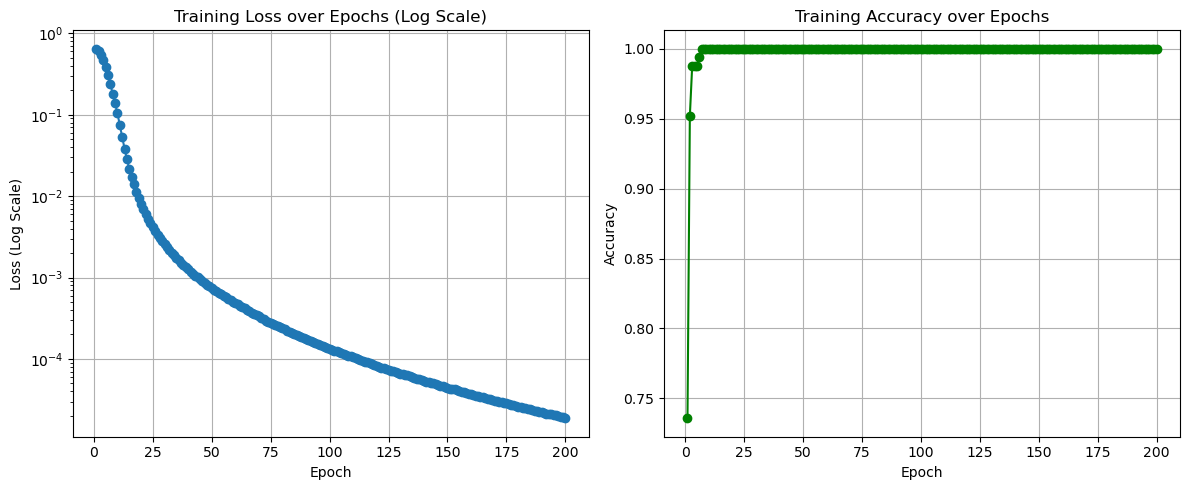

In [44]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.semilogy(range(1, n_epochs + 1), train_losses, label="Loss", marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss (Log Scale)")
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))  
plt.title("Training Loss over Epochs (Log Scale)")
plt.grid(True)

# Accuracy plot (normal)
plt.subplot(1, 2, 2)
plt.plot(range(1, n_epochs + 1), train_accuracies, label="Accuracy", marker='o', color='green')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True)) 
plt.title("Training Accuracy over Epochs")
plt.grid(True)

plt.tight_layout()
plt.show()

Evaluating model on test set...

 Classification Report:
              precision    recall  f1-score   support

      Female       1.00      1.00      1.00        37
        Male       1.00      1.00      1.00        47

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



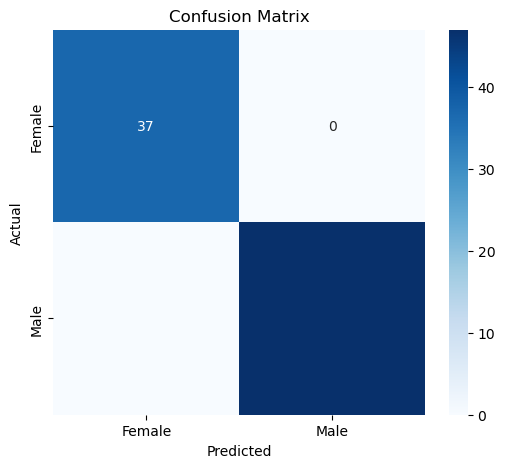

In [42]:
# Step 4: Evaluate the Model
print("Evaluating model on test set...")
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.numpy())
        all_labels.extend(labels.numpy())

# Classification report
print("\n Classification Report:")
print(classification_report(all_labels, all_preds, target_names=['Female', 'Male']))

# Confusion Matrix
conf_mat = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



 Sample Predictions:
    Hemoglobin  Platelet_Count  White_Blood_Cells  Red_Blood_Cells       MCV  \
0    -1.137585       -1.117868          -0.570194        -1.138272 -0.983791   
1     0.967275        0.918467           0.862161         0.888744  0.716689   
2    -1.137585       -1.117868          -0.570194        -1.138272 -0.983791   
3     0.967275        1.088161           0.862161         0.888744  0.716689   
4     0.421570        1.088161           1.100887         0.381990  0.291569   
5     1.435021        0.918467           0.742798         0.719826  0.504129   
6     0.031781        0.409383           0.026621         0.213072  0.291569   
7     0.577486        0.069994           0.265346         1.226580  0.929249   
8    -0.903712       -0.948173          -0.689557        -1.138272 -0.983791   
9    -0.825754       -0.778479          -0.570194        -0.800436 -0.346111   
10    0.421570        0.748772           0.504072         0.719826  0.716689   
11   -0.591881    

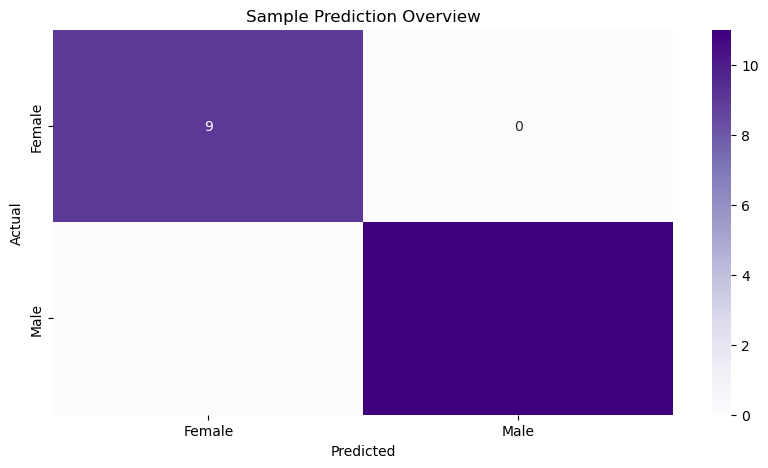

In [25]:
# Step 5: Visualize Predictions vs Actual (on 20 test samples)
sample_indices = np.random.choice(len(test_ds), 20, replace=False)
X_sample = torch.stack([test_ds[i][0] for i in sample_indices])
y_sample = torch.tensor([test_ds[i][1] for i in sample_indices])

with torch.no_grad():
    pred_sample = model(X_sample)
    pred_labels = torch.argmax(pred_sample, dim=1)

df_viz = pd.DataFrame(X_sample, columns=features)
df_viz['Actual'] = ['Male' if a == 1 else 'Female' for a in y_sample.numpy()]
df_viz['Predicted'] = ['Male' if p == 1 else 'Female' for p in pred_labels.numpy()]


print("\n Sample Predictions:")
print(df_viz)

plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(df_viz['Actual'], df_viz['Predicted']), annot=True, cmap='Purples')
plt.title("Sample Prediction Overview")
plt.show()


In [50]:
import torch
import torch.nn as nn
import numpy as np
import joblib

# Load the trained model
class BloodClassifier(nn.Module):
    def __init__(self):
        super(BloodClassifier, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(7, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 2)
        )
    def forward(self, x):
        return self.net(x)

model = BloodClassifier()
model.load_state_dict(torch.load("blood_classifier_model.pth"))
model.eval()

# Load the scaler
scaler = joblib.load("scaler.pkl")

# Input features from the user
print(" Please enter the following blood test values:")
feature_names = [
    "Hemoglobin",
    "Platelet Count",
    "White Blood Cells",
    "Red Blood Cells",
    "MCV",
    "MCH",
    "MCHC"
]

user_inputs = []
for name in feature_names:
    val = float(input(f"Enter {name}: "))
    user_inputs.append(val)

# Convert to numpy, reshape, and scale
X_new = np.array(user_inputs).reshape(1, -1)
X_scaled = scaler.transform(X_new)
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)

# Make prediction
with torch.no_grad():
    output = model(X_tensor)
    pred_label = torch.argmax(output, dim=1).item()

# Output result
gender = "Male" if pred_label == 1 else "Female"

print("\n Input Values You Entered:")
for name, val in zip(feature_names, user_inputs):
    print(f"  {name}: {val}")

print(f"\n Predicted Gender: {gender}")

 Please enter the following blood test values:

 Input Values You Entered:
  Hemoglobin: 112.0
  Platelet Count: 112.0
  White Blood Cells: 112.0
  Red Blood Cells: 112.0
  MCV: 112.0
  MCH: 112.0
  MCHC: 112.0

 Predicted Gender: Male
